# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import openweathermapy.core as ow
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from config import my_api_key
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
test_cities = ["Lisbon", "fremont", "foobar", "Paris", "london"]

In [9]:
from pprint import pprint
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_data = []
city_name = []
lat = []
lon = []
cloud = []
country = []
humidity = []
max_temp = []
wind_speed = []
date = []

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    query_url = url + "appid=" + my_api_key + "&q=" + city + "&units=imperial"

    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    if weather_json["cod"] == "404":
        print("City not found. Skipping...")
    else:
        print(f"Processing Record of {city}")
        weather_data.append(weather_json)
        city_name.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        cloud.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        humidity.append(weather_json['main']['humidity'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        date.append(weather_json['dt'])

print("-----------------------------")
print("Ending Data Retrieval")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record of tuktoyaktuk
Processing Record of rikitea
Processing Record of punta arenas
Processing Record of ushuaia
Processing Record of xuddur
Processing Record of sinazongwe
Processing Record of bredasdorp
Processing Record of coahuayana
Processing Record of chiredzi
Processing Record of ottumwa
Processing Record of mataura
Processing Record of port elizabeth
Processing Record of busselton
City not found. Skipping...
Processing Record of airai
Processing Record of haines junction
Processing Record of tuatapere
Processing Record of saskylakh
Processing Record of cape town
Processing Record of sibenik
Processing Record of ilulissat
Processing Record of klaksvik
Processing Record of samarai
City not found. Skipping...
Processing Record of kyren
Processing Record of nabire
Processing Record of tamiahua
Processing Record of albany
Processing Record of nanortalik
Processing Record of torbay
Processing Record of horta
Processin

Processing Record of zlobin
Processing Record of lebu
Processing Record of malakal
Processing Record of stephenville
City not found. Skipping...
Processing Record of north bend
Processing Record of digby
Processing Record of aleksandrov gay
Processing Record of ibia
Processing Record of ancud
Processing Record of camacupa
Processing Record of leningradskiy
Processing Record of alta floresta
Processing Record of hammerfest
Processing Record of cap malheureux
Processing Record of mabaruma
Processing Record of mbale
Processing Record of padang
Processing Record of kapit
City not found. Skipping...
Processing Record of bowen
Processing Record of shimoda
Processing Record of kurtamysh
Processing Record of dogondoutchi
Processing Record of aksu
Processing Record of sisimiut
Processing Record of achacachi
Processing Record of avera
Processing Record of vila
Processing Record of lompoc
Processing Record of barra do bugres
Processing Record of mae sai
Processing Record of saint-philippe
Process

Processing Record of mattru
Processing Record of yongan
Processing Record of san policarpo
Processing Record of ahuimanu
Processing Record of kununurra
Processing Record of bernal
Processing Record of abu samrah
Processing Record of amanganj
Processing Record of hamilton
City not found. Skipping...
Processing Record of okmulgee
Processing Record of asau
Processing Record of iskateley
Processing Record of palmerston
Processing Record of luganville
Processing Record of guerrero negro
Processing Record of mayskiy
Processing Record of maarianhamina
Processing Record of mao
Processing Record of pemangkat
Processing Record of xai-xai
Processing Record of prince george
Processing Record of hue
Processing Record of inuvik
Processing Record of ramsar
Processing Record of honiara
Processing Record of dublin
Processing Record of awbari
Processing Record of maceio
City not found. Skipping...
Processing Record of nishihara
Processing Record of atherton
Processing Record of qasigiannguit
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#Display the DataFrame
weather_dict = {
    "Cities": city_name,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tuktoyaktuk,40,CA,1586369783,77,69.45,-133.04,1.40,8.05
1,Rikitea,51,PF,1586369730,81,-23.12,-134.97,76.89,11.77
2,Punta Arenas,6,CL,1586369774,55,-53.15,-70.92,66.20,12.75
3,Ushuaia,39,AR,1586369758,32,-54.80,-68.30,68.00,5.82
4,Oddur,37,SO,1586370027,43,4.12,43.89,84.83,13.11


In [12]:
weather_df.count()

Cities        540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

In [13]:
#Export the city data into a .csv.
weather_df.to_csv("../city_data.csv", encoding='utf-8', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

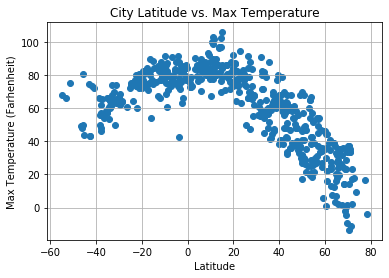

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (Farhenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/CityLatitudevsMaxTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot